# 25 MARCH ASSIGNMENT

## Flight Price:

Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the
dataset have?

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df=pd.read_excel('flight_price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [104]:
df.shape

(10683, 11)

Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the
distribution.

<AxesSubplot: xlabel='Price', ylabel='Count'>

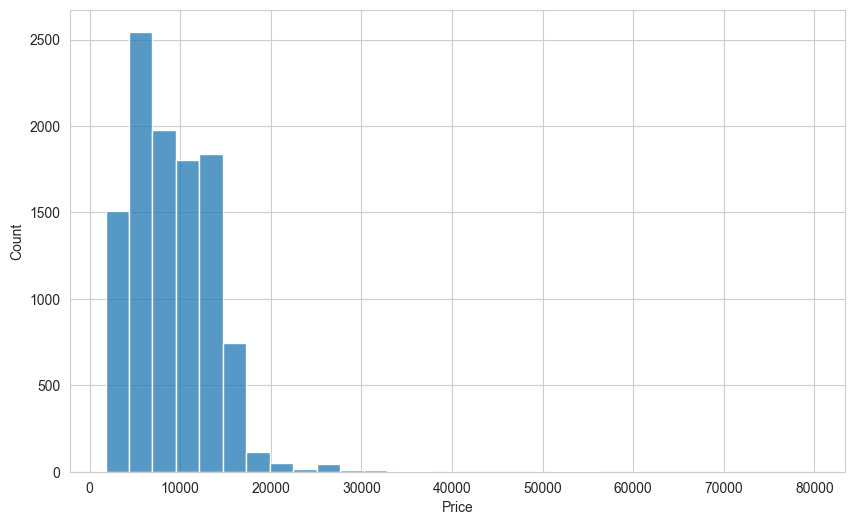

In [105]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'],bins=30)

Q3. What is the range of prices in the dataset? What is the minimum and maximum price?

In [106]:
price_range = df['Price'].max() - df['Price'].min()

min_price = df['Price'].min()
max_price = df['Price'].max()

In [107]:
print("Price Range: ",price_range)
print("Minimum Price: ",min_price)
print("Maximum Price: ",max_price)

Price Range:  77753
Minimum Price:  1759
Maximum Price:  79512


Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different
airlines.

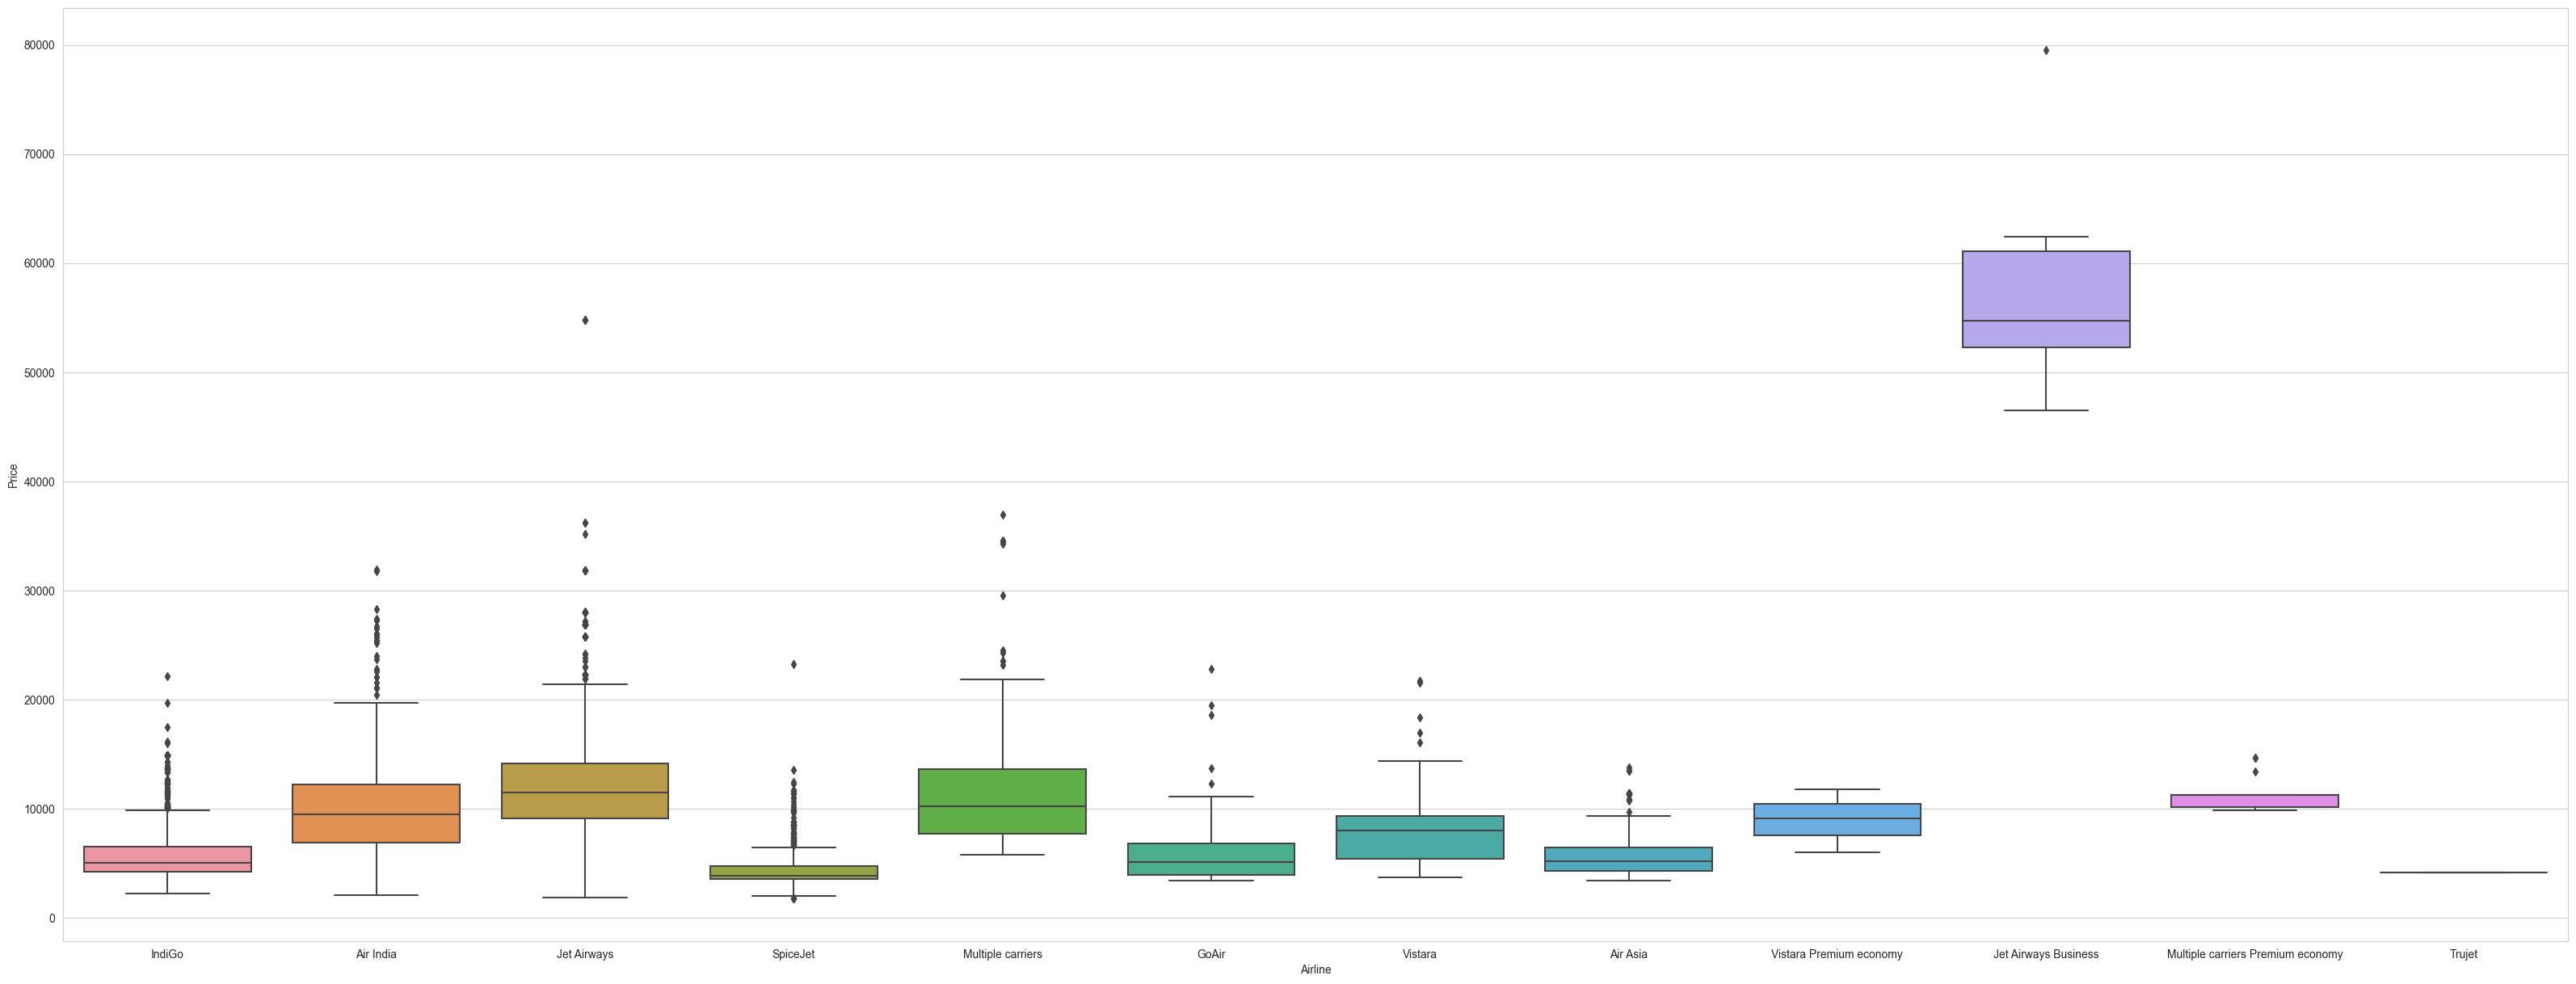

In [108]:
plt.figure(figsize=(40,15))
sns.boxplot(x='Airline', y='Price', data=df)
plt.show()

Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how
they may impact your analysis.

In [109]:

Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

print("Number of outliers:", outliers.shape[0])

Number of outliers: 94


Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset
to identify the peak travel season. What features would you analyze to identify the peak season, and how
would you present your findings to your boss?

In [110]:

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

df['Month'] = df['Date_of_Journey'].dt.month
df['Year'] = df['Date_of_Journey'].dt.year

C:\Users\yashp\AppData\Local\Temp\ipykernel_25480\2452253666.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])


In [111]:

avg_prices_by_month = df.groupby('Month')['Price'].mean()
avg_prices_by_year = df.groupby('Year')['Price'].mean()

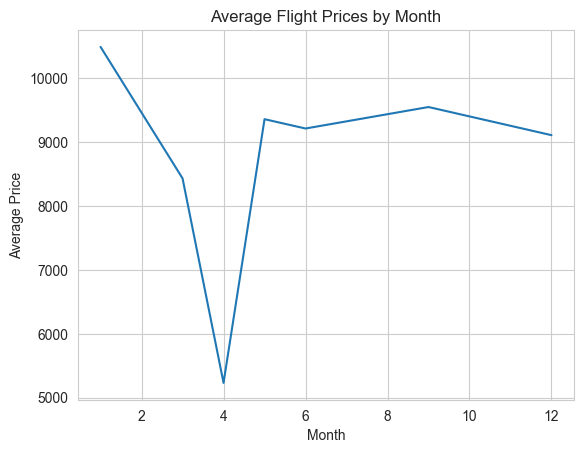

In [112]:
#line charts to visualize the trends in flight prices
plt.plot(avg_prices_by_month)
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average Flight Prices by Month')
plt.show()



Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight
Price dataset to identify any trends in flight prices. What features would you analyze to identify these
trends, and what visualizations would you use to present your findings to your team?

As a data analyst for a flight booking website, here are some features I would look at to identify price trends:

1. Date of travel: I'd look at how flight rates change over time, such as by month, day of the week, or season. This might provide insight on the demand for flights at various periods of the year.

2. Airline: I would investigate how flight fares differ by airline. Some airlines may be more expensive than others due to factors such as service quality or route options.

3. Route: I would investigate how airline fares differ by route. Some routes may be more expensive owing to considerations such as distance, popularity, or competition.

I would utilise numerous visuals to show my findings, such as:

1. Line charts: I'd use line charts to show patterns in flight fares over time, such as by month or weekday.

2. Box plots: I'd use box plots to compare travel rates across multiple airlines or itineraries, allowing me to see any outliers or pricing variances.


Q8. You are a data scientist working for an airline company, and you have been asked to analyze the
Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to
identify these factors, and how would you present your findings to the management team?

As a data scientist for an airline company, I would examine the following features to determine the factors that influence flight prices:

1. Cities of departure and arrival: The cost of a flight might vary based on the cities involved. Flights between big cities, for example, may be more expensive than flights between smaller cities.

2. Airlines have diverse price schemes, and some may provide more facilities or have more competitive pricing.

3. Flight duration: The length of the flight can impact the price, with longer flights usually costing more.

4. Time of year: Seasonality can also impact flight prices. Flights, for example, may be more expensive during peak travel periods such as holidays or summer vacations.

## Google Playstore:

Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does
the dataset have?

In [113]:
df2= pd.read_csv('google_cleaned.csv')
df2.head(2)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018


In [114]:
df2.shape

(10840, 17)

Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different
app categories.

<Figure size 3000x4000 with 0 Axes>

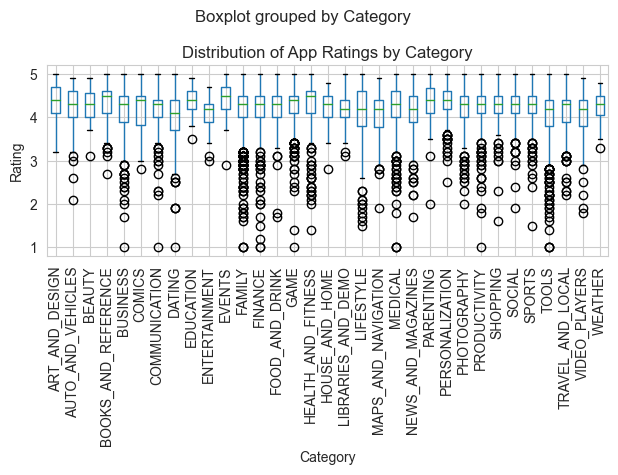

In [115]:
plt.figure(figsize=(30,40))
df2.boxplot(column=['Rating'], by='Category', rot=90, fontsize=10)
plt.title('Distribution of App Ratings by Category')
plt.ylabel('Rating')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may
impact your analysis.


In [116]:
df2.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize
the relationship.

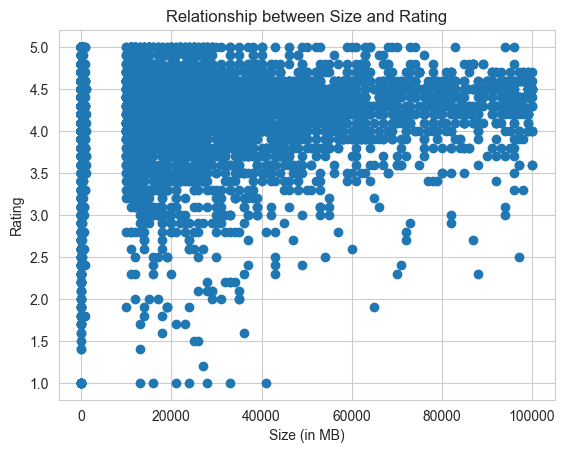

In [117]:
df2.dropna(inplace=True)
plt.scatter(df2['Size'], df2['Rating'])
plt.xlabel('Size (in MB)')
plt.ylabel('Rating')
plt.title('Relationship between Size and Rating')
plt.show()

Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.

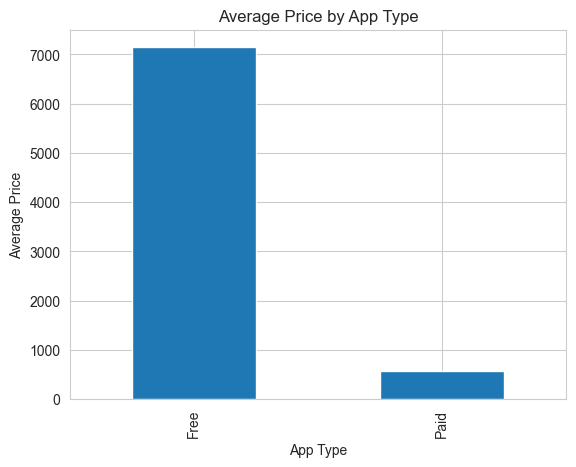

In [118]:
grouped = df2['Type'].value_counts()
# Plot the results using a bar chart
grouped.plot(kind='bar')
plt.title('Average Price by App Type')
plt.xlabel('App Type')
plt.ylabel('Average Price')
plt.show()

Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps
with the highest number of installs.

In [123]:
df_sorted = df2.sort_values("Installs", ascending=False)

top_10 = df_sorted.head(10)

top_10[["App", "Installs"]]

,App,Installs
1654,Subway Surfers,1000000000
3896,Subway Surfers,1000000000
3765,Google News,1000000000
1872,Subway Surfers,1000000000
1917,Subway Surfers,1000000000
9844,Google News,1000000000
1700,Subway Surfers,1000000000
3736,Google News,1000000000
3816,Google News,1000000000
1750,Subway Surfers,1000000000


Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the
Google Playstore dataset to identify the most popular app categories. How would you approach this
task, and what features would you analyze to make recommendations to the company?

I would recommend the following method for identifying the most popular app categories:

1. Analyze the frequency table of app categories to determine which categories have the most apps.

2. For each app category, compute the average rating and number of installs.

3. Provide a visual comparison of the average ratings and number of installations for each app category, such as a bar chart or scatter plot.

4. Examine the price of applications in each category for trends and patterns.

5. Determine any new categories with an increasing number of apps and installs.

Based on this analysis, I would advise the company to develop an app in one of the most popular categories, with a high average rating and an increasing number of installs. Furthermore, the organisation should carefully analyse the app's price plan and guarantee that it is competitive in the chosen sector.

Q16. A mobile app development company wants to analyze the Google Playstore dataset to identify the
most successful app developers. What features would you analyze to make recommendations to the
company, and what data visualizations would you use to present your findings?

In [137]:
developer_df = df2.groupby('Installs')['App'].sum().reset_index()

In [138]:
developer_df = developer_df.sort_values('Installs', ascending=False)

In [139]:
top_10_developers = developer_df.head(10)

In [140]:
top_10_developers

,Installs,App
18,1000000000,Subway SurfersSubway SurfersSubway SurfersSubw...
17,500000000,imo free video calls and chatUC Browser - Fast...
16,100000000,OfficeSuite : Free Office + PDF EditorOfficeSu...
15,50000000,Sketch - Draw & PaintSecure FolderCM Browser -...
14,10000000,Tattoo Name On My Photo Editoribis Paint XCanv...
13,5000000,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
12,1000000,Infinite PainterGarden Coloring BookText on Ph...
11,500000,Coloring book moanaPhoto Designer - Write your...
10,100000,Pixel Draw - Number Art Coloring BookMandala C...
9,50000,Paper flowers instructionsSmoke Effect Photo M...


Q17. A marketing research firm wants to analyze the Google Playstore dataset to identify the best time to
launch a new app. What features would you analyze to make recommendations to the company, and
what data visualizations would you use to present your findings?

In [143]:
df2.columns

Index(['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size',
       'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Day', 'Month', 'Year'],
      dtype='object')

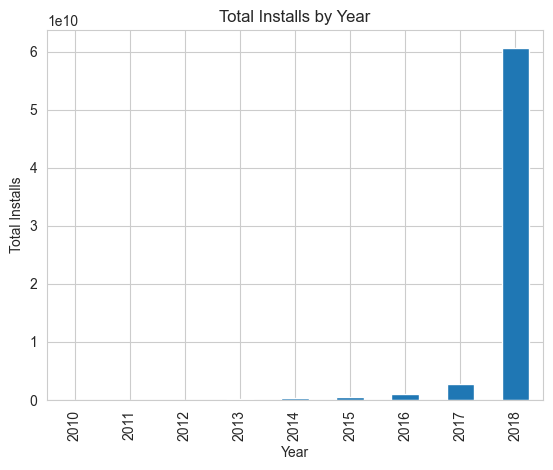

In [147]:

df2['Last Updated'] = pd.to_datetime(df2['Last Updated'])

df2['Year'] = df2['Last Updated'].dt.year

# Group the data by year and sum the number of installs
install_by_year = df2.groupby('Year')['Installs'].sum()

# Plot a bar chart of the total number of installs by year
install_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Total Installs')
plt.title('Total Installs by Year')
plt.show()